##Collecting Dataset

170498071/170498071 [==============================] - 2s 0us/step


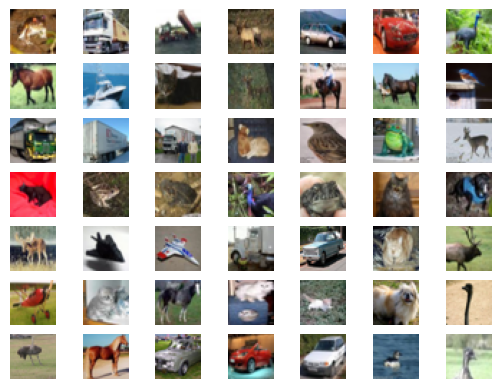

In [ ]:
from keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = load_data()
for i in range(49) :
  plt.subplot(7,7,i+1)
  plt.axis('off')
  plt.imshow(x_train[i])
plt.show()

##Importing Tensorflow Functions


In [ ]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model
import numpy as np
from numpy import ones

##Discriminator Architecture

In [ ]:
def define_discriminator(in_shape=(32,32,3)) :
  model = Sequential()
  model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation='sigmoid'))

  opt = Adam(lr=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)         2

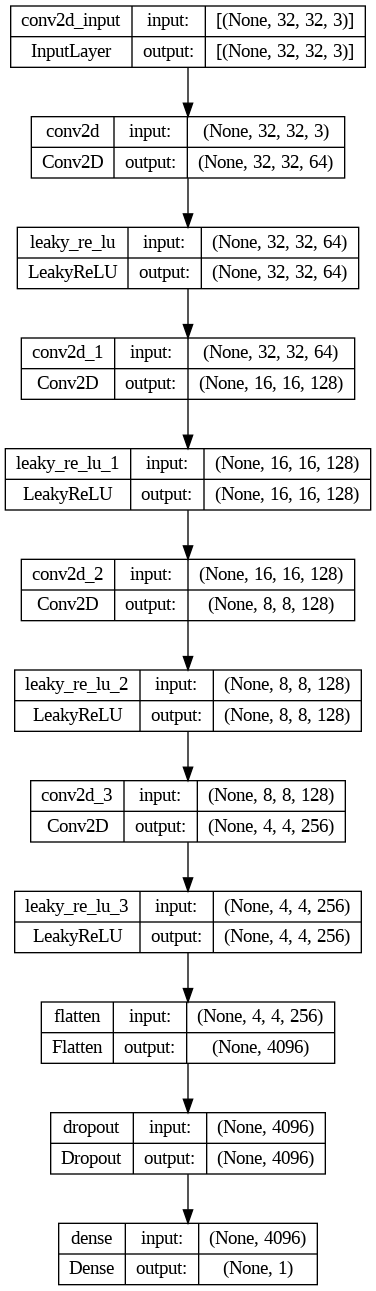

In [ ]:
model = define_discriminator()
model.summary()
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
def load_real_samples() :
  (x_train, _), (_, _) = load_data()
  x = x_train.astype('float32')
  x = (x - 127.5) / 127.5
  return x

In [ ]:
x = load_real_samples()

In [ ]:
def generate_real_samples(dataset, n_samples) :
  ix = np.random.randint(0, dataset.shape[0], n_samples)
  x = dataset[ix]
  y = np.ones((n_samples, 1))
  return x, y

In [ ]:
def generate_fake_samples(n_samples) :
  x = np.random.rand(32 * 32 * 3 * n_samples)
  x = -1 + x * 2
  x = x.reshape((n_samples, 32, 32, 3))
  y = np.zeros((n_samples, 1))
  return x, y

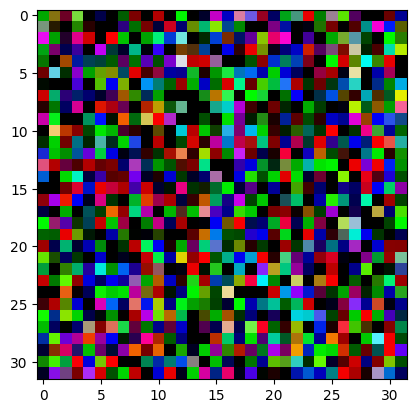

In [ ]:
x, y = generate_fake_samples(64)
plt.imshow(x[0])

In [ ]:
def train_discrriminator(model, dataset, n_iter=20, n_batch=128) :
  half_batch = int(n_batch / 2)
  for i in range(n_iter) :
    x_real, y_real = generate_real_samples(dataset, half_batch)
    _, real_acc = model.train_on_batch(x_real, y_real)

    x_fake, y_fake = generate_fake_samples(half_batch)
    _, fake_acc = model.train_on_batch(x_fake, y_fake)

    print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

In [ ]:
model = define_discriminator()
dataset = load_real_samples()
train_discrriminator(model, dataset)

>1 real=73% fake=0%
>2 real=100% fake=2%
>3 real=97% fake=12%
>4 real=98% fake=67%
>5 real=98% fake=100%
>6 real=97% fake=100%
>7 real=100% fake=100%
>8 real=98% fake=100%
>9 real=100% fake=100%
>10 real=100% fake=100%
>11 real=100% fake=100%
>12 real=100% fake=100%
>13 real=100% fake=100%
>14 real=100% fake=100%
>15 real=100% fake=100%
>16 real=100% fake=100%
>17 real=100% fake=100%
>18 real=100% fake=100%
>19 real=100% fake=100%
>20 real=100% fake=100%


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model

##Generator Architecture

In [ ]:
def define_generator(latent_dim) :
  model = Sequential()

  n_nodes = 256 * 4 * 4

  model.add(Dense(n_nodes, input_dim=latent_dim))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((4, 4, 256)))

  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
  return model


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 4096)              0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 8, 8, 128)         524416    
 anspose)                                                        
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 16, 16, 128)       262272    
 Transpose)                                           

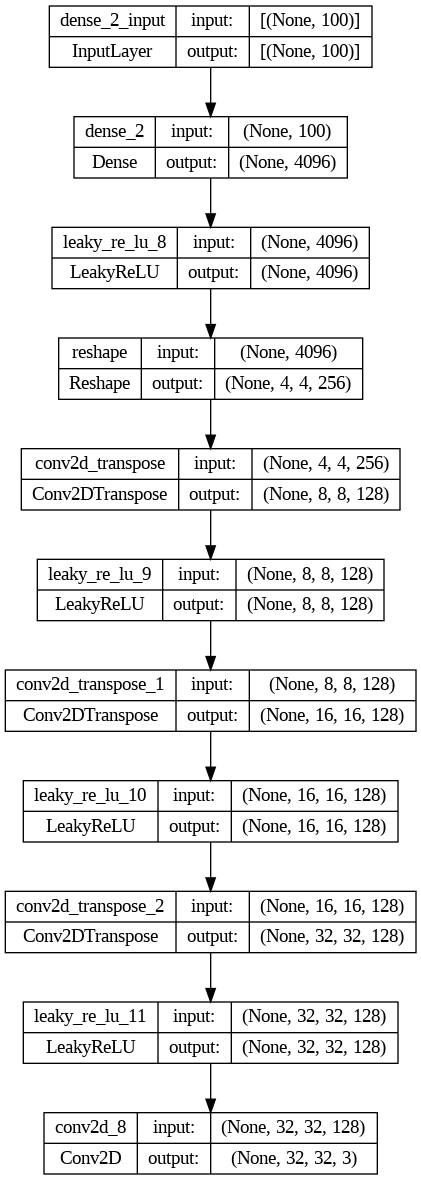

In [ ]:
latent_dim = 100
model = define_generator(latent_dim)
model.summary()
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
def generate_latent_points(latent_dim, n_samples) :
  x_input = np.random.randn(latent_dim * n_samples)
  x_input = x_input.reshape(n_samples, latent_dim)
  return x_input

In [ ]:
def generate_fake_samples(g_model, latent_dim, n_samples) :
  x_input = generate_latent_points(latent_dim, n_samples)
  x = g_model.predict(x_input)
  y = np.zeros((n_samples, 1))
  return x, y

2/2 [==============================] - 0s 109ms/step


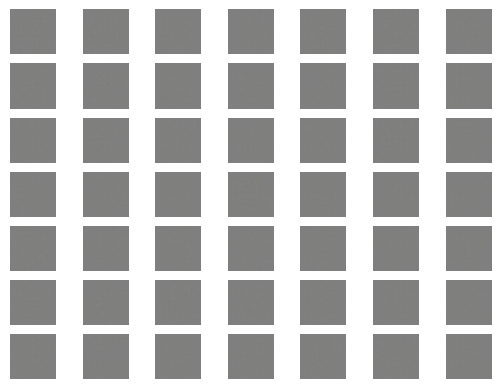

In [ ]:
latent_dim = 100
model = define_generator(latent_dim)
n_samples = 49
x, _ = generate_fake_samples(model, latent_dim, n_samples)
x = (x + 1) / 2.0

for i in range(n_samples) :
  plt.subplot(7,7,1+i)
  plt.axis('off')
  plt.imshow(x[i])
plt.show()

##Defining GAN Model

In [ ]:
def define_gan(g_model, d_model) :
  d_model.trainable = False
  model = Sequential()
  model.add(g_model)
  model.add(d_model)

  opt = Adam(lr=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt)
  return model

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 32, 32, 3)         1466115   
                                                                 
 sequential_4 (Sequential)   (None, 1)                 522497    
                                                                 
Total params: 1988612 (7.59 MB)
Trainable params: 1466115 (5.59 MB)
Non-trainable params: 522497 (1.99 MB)
_________________________________________________________________


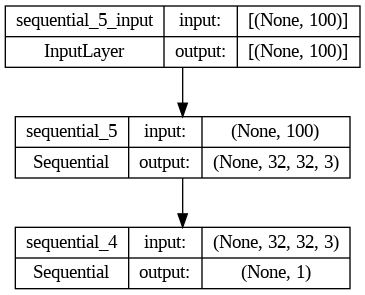

In [ ]:
latent_dim = 100
d_model = define_discriminator()
g_model = define_generator(latent_dim)
gan_model = define_gan(g_model, d_model)
gan_model.summary()
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

##Training the whole Model

In [ ]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=200, n_batch=128) :
  batch_per_epoch = int(dataset.shape[0] / n_batch)
  half_batch = int(n_batch / 2)

  for i in range(n_epochs) :
    for j in range(batch_per_epoch) :
      x_real, y_real = generate_real_samples(dataset, half_batch)
      d_loss1 = d_model.train_on_batch(x_real, y_real)

      x_fake, y_fake =generate_fake_samples(g_model, latent_dim, half_batch)
      d_loss_2 = d_model.train_on_batch(x_fake, y_fake)

      x_gan = generate_latent_points(latent_dim, n_batch)
      y_gan = np.ones((n_batch, 1))
      g_loss = gan_model.train_on_batch(x_gan, y_gan)

      if isinstance(d_loss1, list):
        d_loss1 = d_loss1[0]
      if isinstance(d_loss_2, list):
        d_loss_2 = d_loss_2[0]
      if isinstance(g_loss, list):
        g_loss = g_loss[0]

      print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' % (i+1, j+1, batch_per_epoch, d_loss1, d_loss_2, g_loss))
    if (i+1) % 10 == 0 :
      summarize_perfomance(i, g_model, d_model, dataset, latent_dim)

In [ ]:
def summarize_perfomance(epoch, g_model, d_model, dataset, latent_dim, n_samples=150) :
  x_real, y_real = generate_real_samples(dataset, n_samples)
  _, acc_real = d_model.evaluate(x_real, y_real, verbose=0)

  x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
  _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)

  print('>Accuracy real= %.0f%%, fake= %.0f%%' % (acc_real*100, acc_fake*100))
  save_plot(x_fake, epoch)
  filename = 'generator_model_%03d.h5' % (epoch+1)
  g_model.save(filename)


##Saving the Generated Images

In [ ]:
def save_plot(examples, epoch, n=7) :
  examples = (examples + 1) / 2.0

  for i in range(n * n) :
    plt.subplot(n, n, 1+i)
    plt.axis('off')
    plt.imshow(examples[i])
  filename = 'generated_plot_%03d.png' % (epoch+1)
  plt.savefig(filename)
  plt.close()

##GAN Model Compilation

In [ ]:
g_model.compile(loss='binary_crossentropy', optimizer='adam')
train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=200, n_batch=128)